In [2]:
## 1. Load Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from dateutil.parser import parse

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

## Load Data
DATA_DIR = "datasets" 
DATA_FILE = "OG_equity_lens_pilot-20180313.csv"

print( "Loading %s from >> %s" % (DATA_FILE, DATA_DIR))
dataset = pd.read_csv( "%s/%s" % (DATA_DIR, DATA_FILE))

print( "Dataset Loaded: \n" )
dataset.head(3)


## https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/ <<< Class 

Loading OG_equity_lens_pilot-20180313.csv from >> datasets
Dataset Loaded: 



,CHP.ID,Nmb.Households.Registered,Nmb.HH.Done.FamilySurvey,Pct.HH.Done.FamilySurvey,Branch.Name
0,CHP.Og.1,88,47,0.534091,Busia
1,CHP.Og.2,110,61,0.554545,Butula
2,CHP.Og.3,113,37,0.327434,Funyula


In [3]:
## Data Structure

print( "Glimpse Details:  ") 
dataset.describe() 


### Notes
'''
1. n=72
2. No missing values except for Branch.Name, which has 58 << see output in next cell 
3. Non-numeric variables are not accounted for

''' 


Glimpse Details:  


'\n1. n=72\n2. No missing values except for Branch.Name, which has 58 << see output in next cell \n3. Non-numeric variables are not accounted for\n\n'

In [4]:
print ("Checking for NULL values per variable")
dataset.apply(lambda x: sum(x.isnull()),axis=0)  

Checking for NULL values per variable


CHP.ID                        0
Nmb.Households.Registered     0
Nmb.HH.Done.FamilySurvey      0
Pct.HH.Done.FamilySurvey      0
Branch.Name                  58
dtype: int64

In [5]:
dataset['Branch.Name'].value_counts()

Shinyalu         1
Butula           1
Malaba           1
Port Victoria    1
Nambale          1
Kuresoi          1
Thika            1
HQ               1
Suneka           1
Malava           1
Ogembo           1
Kenyenya         1
Funyula          1
Busia            1
Name: Branch.Name, dtype: int64

In [6]:
## Sample Structure
print("If each CHP as mapped to a branch then we could see the # CHPs per branch as above\n")


If each CHP as mapped to a branch then we could see the # CHPs per branch as above



Households per CHP distribution, using default plotter


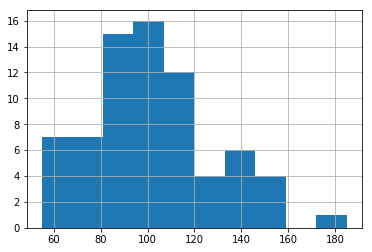

In [7]:
## Distributions 
print("Households per CHP distribution, using default plotter")
dataset['Nmb.Households.Registered'].hist()

Households Surveyed per CHP distribution, using default plotter


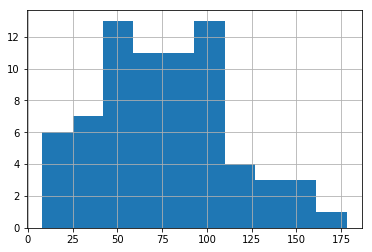

In [8]:
print("Households Surveyed per CHP distribution, using default plotter")
dataset['Nmb.HH.Done.FamilySurvey'].hist()

% Households Surveyed per CHP distribution, using default plotter


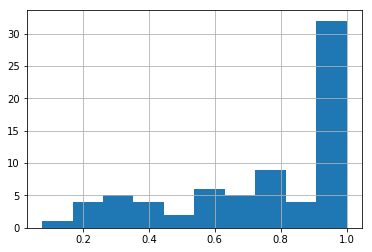

In [9]:
print("% Households Surveyed per CHP distribution, using default plotter")
dataset['Pct.HH.Done.FamilySurvey'].hist()


Box Plots, using default plotter


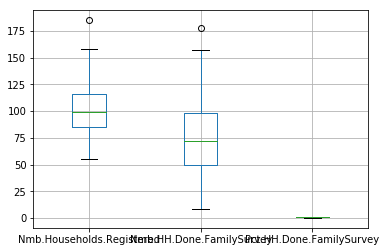

In [12]:
## Summary Stats 



print("Box Plots, using default plotter")
dataset.boxplot()



array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0C1F56A20>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001F0C1FD32E8>], dtype=object)

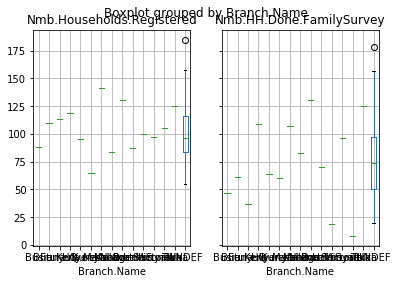

In [13]:
## Fill Branch.Name empties with ÜNDEF and box plot by branch 

dataset['Branch.Name'].fillna( "UNDEF", inplace=True)

dataset.boxplot(column=( "Nmb.Households.Registered", "Nmb.HH.Done.FamilySurvey"), by="Branch.Name")


What's the relationship between HH size and HH doing survey --- First the distribution


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0C19141D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F0C25184A8>]], dtype=object)

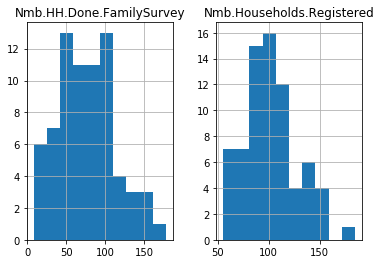

In [14]:
## Bivariate analysis 
print("What's the relationship between HH size and HH doing survey --- First the distribution")
dataset[["Nmb.Households.Registered", "Nmb.HH.Done.FamilySurvey"]].hist(stacked=True)


What's the relationship between HH size and HH doing survey --- A scatter plot


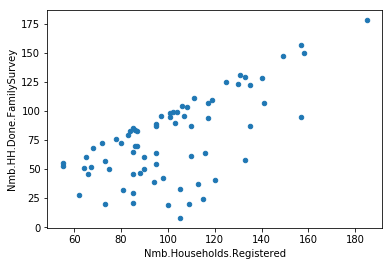

In [15]:
print("What's the relationship between HH size and HH doing survey --- A scatter plot")
dataset.plot.scatter(x="Nmb.Households.Registered", y="Nmb.HH.Done.FamilySurvey")


In [16]:
print("What's the relationship between HH size and HH doing survey --- correlation ")
dataset[["Nmb.Households.Registered","Nmb.HH.Done.FamilySurvey"]].corr()

What's the relationship between HH size and HH doing survey --- correlation 


,Nmb.Households.Registered,Nmb.HH.Done.FamilySurvey
Nmb.Households.Registered,1.000000,0.666278
Nmb.HH.Done.FamilySurvey,0.666278,1.000000


In [17]:
## R equivalent
# load
# head
# glimse
# describe / dplyr chains 
# ggplot2 